In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [4]:
cur=conn.cursor()

In [5]:

sql="""select * from student"""

In [6]:
df = pandas.read_sql_query(sql,conn)
df[:]

,s_email,s_name,major
0,s2@jmu.edu,s2,IA
1,s3@jmu.edu,s3,ISAT
2,s4@jmu.edu,s4,ISAT
3,s1@jmu.edu,s1,IA
4,s5@jmu.edu,s5,GS


In [7]:
sql = """select professor.p_name,
                course.c_name
                from professor
                inner join course
                on professor.p_email=course.p_email"""

In [8]:
df = pandas.read_sql_query(sql,conn)
df[:]

,p_name,c_name
0,p3,facebook
1,p3,postgresql
2,p3,twitter
3,p4,mongodb


In [9]:
sql = """
      select count(*) as c_count, c_number
      from enroll
      group by c_number"""

<AxesSubplot:xlabel='c_number'>

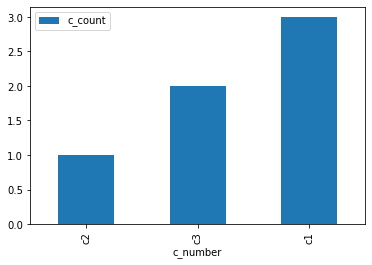

In [10]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x= 'c_number', y ='c_count')

In [11]:
sql = sql = """select professor.p_name,
                count(*) as c_number
                from professor
                inner join course
                on professor.p_email=course.p_email
                group by professor.p_name"""

<AxesSubplot:xlabel='p_name'>

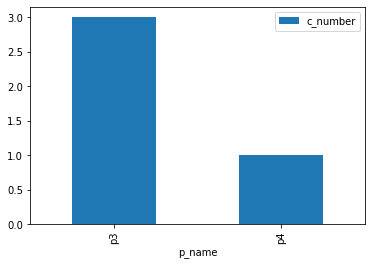

In [12]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='p_name',y='c_number')

In [15]:
sql = """
        insert into course(c_number,c_name,room,p_email)
        values('{}','{}','{}','{}')
        """.format('c5','linkedin','r2','p4@jmu.edu')

In [16]:
cur.execute(sql)

InFailedSqlTransaction: current transaction is aborted, commands ignored until end of transaction block


In [17]:
df =pandas.read_sql_query('select * from professor',conn)
df[:]

DatabaseError: Execution failed on sql 'select * from professor': current transaction is aborted, commands ignored until end of transaction block


In [18]:
conn.rollback()

In [19]:
sql = """
        insert into course(c_number,c_name,room,p_email)
        values('{}','{}','{}','{}')
        """.format('c5','linkedin','r2','p4@jmu.edu')

In [20]:
cur.execute(sql)

In [21]:
df =pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office,courses
0,p2@jmu.edu,p2,o2,c2
1,p3@jmu.edu,p3,o3,"c1,c3,c4"
2,p4@jmu.edu,p4,o4,None


In [22]:
df =pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office,courses
0,p2@jmu.edu,p2,o2,c2
1,p3@jmu.edu,p3,o3,"c1,c3,c4"
2,p4@jmu.edu,p4,o4,None


In [23]:
conn.commit()

In [24]:
sql ="""
   update course
   set p_email ='{}'
   where p_email ='{}' """.format('p4@jmu.edu','p2@jmu.edu')

In [25]:
cur.execute(sql)


In [26]:
conn.commit()

In [27]:
df =pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c2,mongodb,r2,p4@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [28]:
sql ="""
    delete from professor where p_email='{}'
""".format('p2@jmu.edu')


In [29]:
cur.execute(sql)

In [30]:
conn.commit()

In [31]:
df =pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office,courses
0,p3@jmu.edu,p3,o3,"c1,c3,c4"
1,p4@jmu.edu,p4,o4,None
